# Image warping

* Learn to apply different geometric transformations to images, like translation, rotation, affine transformation etc.

OpenCV provides two transformation functions, `cv.warpAffine` and `cv.warpPerspective`, with which you can perform all kinds of transformations. `cv.warpAffine` takes a 2x3 transformation matrix while `cv.warpPerspective` takes a 3x3 transformation matrix as input.

## OpenCV

(pytorch)$ conda install -c conda-forge py-opencv

In [10]:
import numpy as np
import cv2 as cv
from matplotlib import pyplot as plt

plt.rcParams['figure.figsize'] = [16, 9]

## Scaling

Scaling is just resizing of the image.
OpenCV comes with a function `cv.resize()` for this purpose.
The size of the image can be specified manually, or you can specify the scaling factor.
Different interpolation methods are used.
Preferable interpolation methods are `cv.INTER_AREA` for shrinking and `cv.INTER_CUBIC` (slow) & `cv.INTER_LINEAR` for zooming.
By default, the interpolation method `cv.INTER_LINEAR` is used for all resizing purposes.

* Resizes an image.
    * `dst = cv.resize(src, dsize[, dst[, fx[, fy[, interpolation]]]])`
        * dsize: output image size
        * fx: scale factor along the horizontal axis
        * fy: scale factor along the vertical axis;

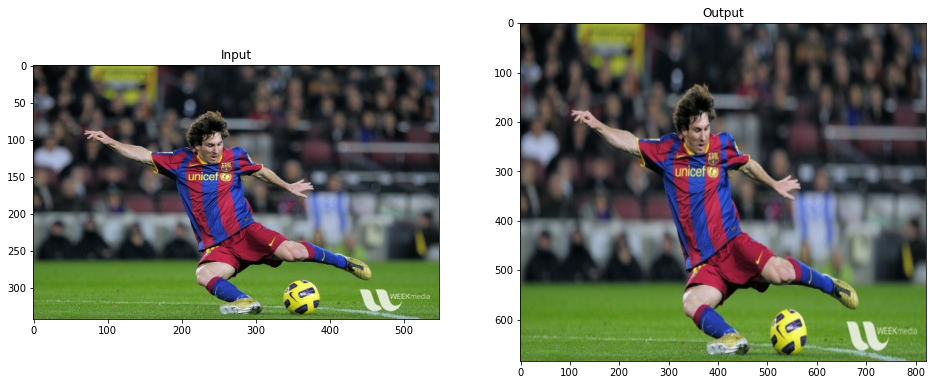

In [11]:
img = cv.imread('messi5.jpg')

height, width = img.shape[:2]
# scale image (1.5x width, 2x height)
# TODO
# resize(src, dsize[, dst[, fx[, fy[, interpolation]]]])
dst = cv.resize(img, (int(1.5 * width), int(2 * height)), interpolation=cv.INTER_LINEAR)

plt.subplot(121),plt.imshow(cv.cvtColor(img,cv.COLOR_BGR2RGB)),plt.title('Input')
plt.subplot(122),plt.imshow(cv.cvtColor(dst,cv.COLOR_BGR2RGB)),plt.title('Output')
plt.show()

## Translation

Translation is the shifting of an object's location.
If you know the shift in the (x,y) direction and let it be (tx,ty), you can create the transformation matrix M as follows:

$M = \begin{bmatrix}1 & 0 & t_x\\ 0 & 1 & t_y\end{bmatrix}$

You can take make it into a Numpy array of type np.float32 and pass it into the cv.warpAffine() function.

* Applies an affine transformation to an image.
    * `dst = cv.warpAffine( src, M, dsize[, dst[, flags[, borderMode[, borderValue]]]])`
    * warning: The third argument of the cv.warpAffine() function is the size of the output image, which should be in the form of **(width, height)**. Remember width = number of columns, and height = number of rows.

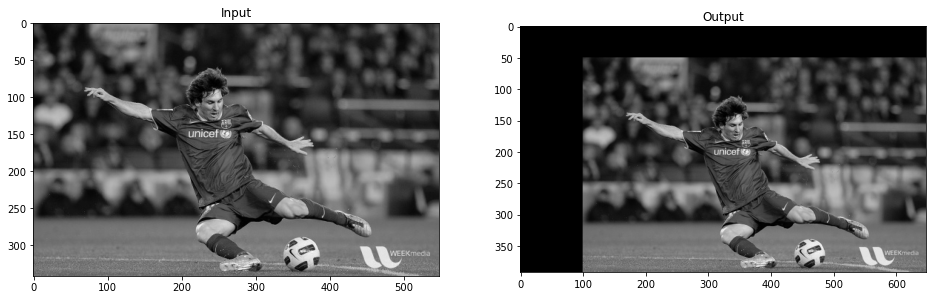

In [21]:
img = cv.imread('messi5.jpg',0)

# translate image (translation of (100,50))
# TODO
rows,cols = img.shape
M = np.float32([[1, 0, 100],
                [0, 1, 50]])
dst = cv.warpAffine(img, M, (cols+100, rows+50))


plt.subplot(121),plt.imshow(cv.cvtColor(img,cv.COLOR_BGR2RGB)),plt.title('Input')
plt.subplot(122),plt.imshow(cv.cvtColor(dst,cv.COLOR_BGR2RGB)),plt.title('Output')
plt.show()

## Rotation

Rotation of an image for an angle θ is achieved by the transformation matrix of the form

$M = \begin{bmatrix} cos\theta & -sin\theta \\ sin\theta & cos\theta \end{bmatrix}$

But OpenCV provides scaled rotation with adjustable center of rotation so that you can rotate at any location you prefer. The modified transformation matrix is given by

$M = \begin{bmatrix} \alpha & \beta & (1- \alpha ) \cdot center.x - \beta \cdot center.y \\ - \beta & \alpha & \beta \cdot center.x + (1- \alpha ) \cdot center.y\end{bmatrix}$

where:

$ \alpha = scale \cdot \cos \theta , \\ \beta = scale \cdot \sin \theta$

To find this transformation matrix, OpenCV provides a function, `cv.getRotationMatrix2D`. Check out the below example which rotates the image by 90 degree with respect to center without any scaling.

* Calculates an affine matrix of 2D rotation.
    * `retval = cv.getRotationMatrix2D(center, angle, scale)`

* Applies an affine transformation to an image.
    * `dst = cv.warpAffine( src, M, dsize[, dst[, flags[, borderMode[, borderValue]]]])`
    * warning: The third argument of the cv.warpAffine() function is the size of the output image, which should be in the form of **(width, height)**. Remember width = number of columns, and height = number of rows.

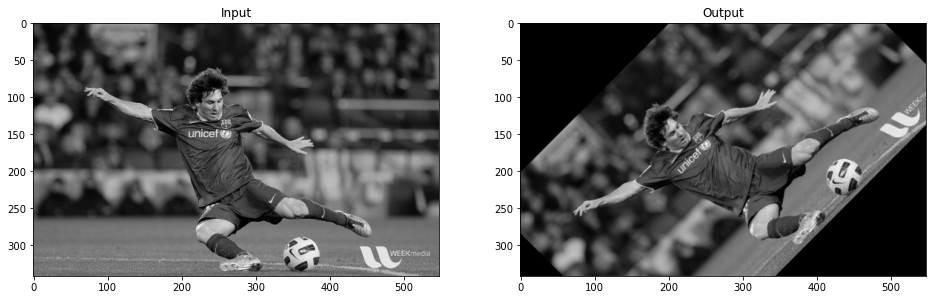

In [19]:
img = cv.imread('messi5.jpg',0)

# compute rotation matrix and rotate image (center should be image center, angle=45, scale=1)
# TODO
rows,cols = img.shape # cols-1 and rows-1 are the coordinate limits.
M = cv.getRotationMatrix2D(((cols-1)//2, (rows-1)//2), 45, 1)
dst = cv.warpAffine(img, M, (cols, rows))


plt.subplot(121),plt.imshow(cv.cvtColor(img,cv.COLOR_BGR2RGB)),plt.title('Input')
plt.subplot(122),plt.imshow(cv.cvtColor(dst,cv.COLOR_BGR2RGB)),plt.title('Output')
plt.show()

## Affine Transformation

In affine transformation, all parallel lines in the original image will still be parallel in the output image. To find the transformation matrix, we need three points from the input image and their corresponding locations in the output image. Then cv.getAffineTransform will create a 2x3 matrix which is to be passed to cv.warpAffine.

Check the below example, and also look at the green points

* Calculates an affine transform from three pairs of the corresponding points.
    * `retval = cv.getAffineTransform(src, dst)`

* Applies an affine transformation to an image.
    * `dst = cv.warpAffine( src, M, dsize[, dst[, flags[, borderMode[, borderValue]]]])`
    * warning: The third argument of the cv.warpAffine() function is the size of the output image, which should be in the form of **(width, height)**. Remember width = number of columns, and height = number of rows.
    
   


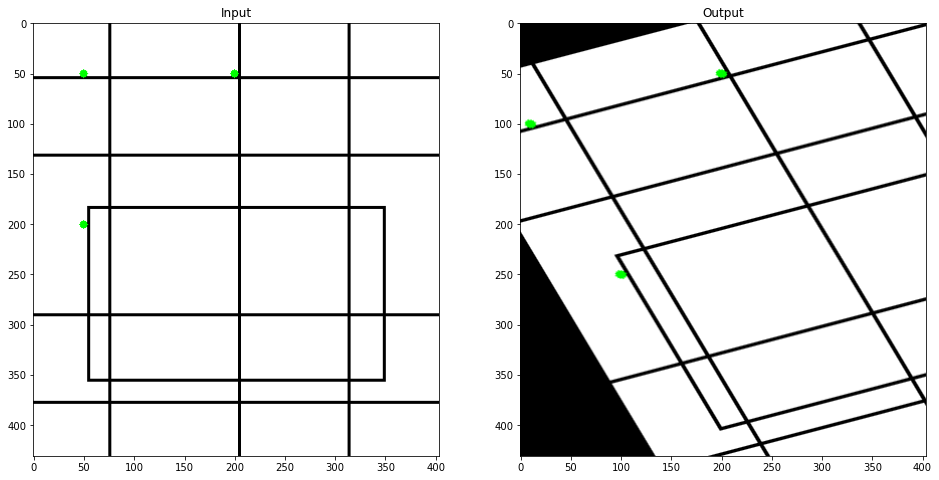

In [23]:
img = cv.imread('drawing.png')

pts1 = np.float32([[50,50],[200,50],[50,200]])
pts2 = np.float32([[10,100],[200,50],[100,250]])

# draw points
for p in pts1:
    p = p.astype('int32')
    img = cv.circle(img, tuple(p), radius=0, color=(0, 255, 0), thickness=8)

# compute affine transformation matrix and transform image
# TODO
rows,cols,ch = img.shape
M = cv.getAffineTransform(pts1, pts2)
dst = cv.warpAffine(img, M, (cols, rows))


plt.subplot(121),plt.imshow(cv.cvtColor(img,cv.COLOR_BGR2RGB)),plt.title('Input')
plt.subplot(122),plt.imshow(cv.cvtColor(dst,cv.COLOR_BGR2RGB)),plt.title('Output')
plt.show()

## Perspective Transformation

For perspective transformation, you need a 3x3 transformation matrix.
Straight lines will remain straight even after the transformation.
To find this transformation matrix, you need 4 points on the input image and corresponding points on the output image.
Among these 4 points, 3 of them should not be collinear.
Then the transformation matrix can be found by the function cv.getPerspectiveTransform.
Then apply cv.warpPerspective with this 3x3 transformation matrix.

* Calculates a perspective transform from four pairs of the corresponding points.
    * `retval = cv.getPerspectiveTransform(src, dst[, solveMethod])`

* Applies a perspective transformation to an image:
    * `dst = cv.warpPerspective(src, M, dsize[, dst[, flags[, borderMode[, borderValue]]]])`

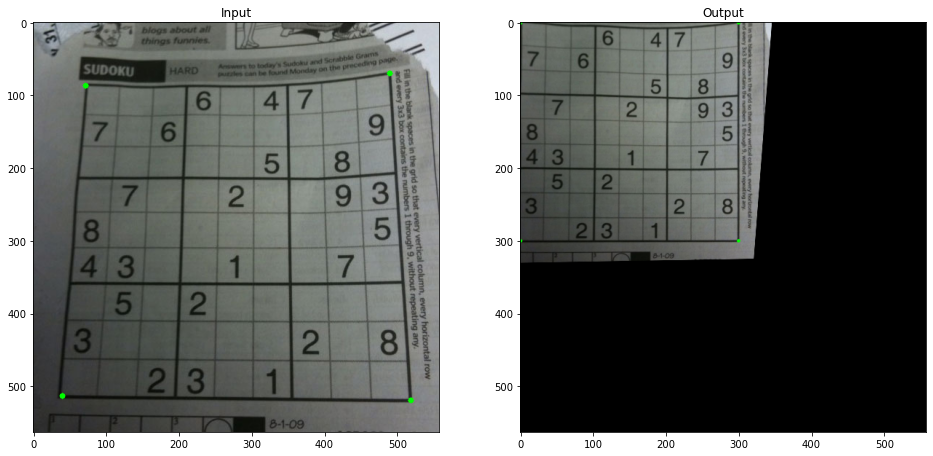

In [24]:
img = cv.imread('sudoku.png')


pts1 = np.float32([[72,87],[490,70],[40,513],[519,519]])
pts2 = np.float32([[0,0],[300,0],[0,300],[300,300]])
# draw points
for p in pts1:
    p = p.astype('int32')
    img = cv.circle(img, tuple(p), radius=0, color=(0, 255, 0), thickness=8)

rows,cols,ch = img.shape
# compute perspective transformation matrix and transform image (dsize=(300,300))
# TODO
M = cv.getPerspectiveTransform(pts1, pts2)
dst = cv.warpPerspective(img, M, (cols, rows))

plt.subplot(121),plt.imshow(cv.cvtColor(img,cv.COLOR_BGR2RGB)),plt.title('Input')
plt.subplot(122),plt.imshow(cv.cvtColor(dst,cv.COLOR_BGR2RGB)),plt.title('Output')
plt.show()

## Scaling

Use cv.warpPerspective() function.

$M = \begin{bmatrix} s_x & 0 & 0 \\ 0 & s_y & 0 \\ 0 & 0 & 1\end{bmatrix}$

(342, 548)


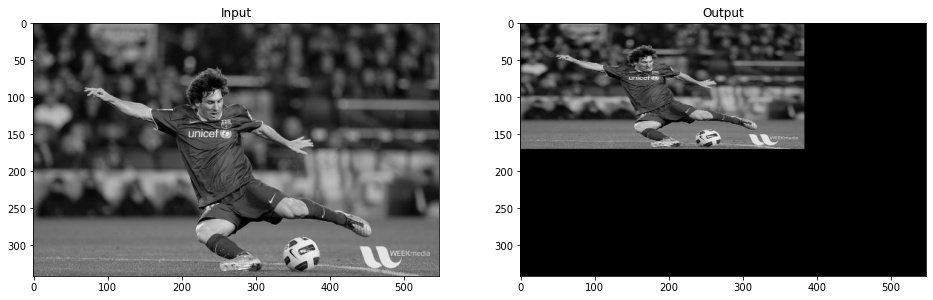

In [26]:
img = cv.imread('messi5.jpg',0)

# scale image (0.7x width, 0.5x height)
# TODO
print(img.shape)
rows,cols = img.shape
M_scale = np.float32([
    [0.7, 0, 0],
    [0, 0.5, 0],
    [0, 0, 1],])
dst = cv.warpPerspective(img, M_scale, (cols, rows))


plt.subplot(121),plt.imshow(cv.cvtColor(img,cv.COLOR_BGR2RGB)),plt.title('Input')
plt.subplot(122),plt.imshow(cv.cvtColor(dst,cv.COLOR_BGR2RGB)),plt.title('Output')
plt.show()

## Shear

Use cv.warpPerspective() function.

$M = \begin{bmatrix} 1 & sh_x & 0 \\ sh_y & 1 & 0 \\ 0 & 0 & 1\end{bmatrix}$

(342, 548)


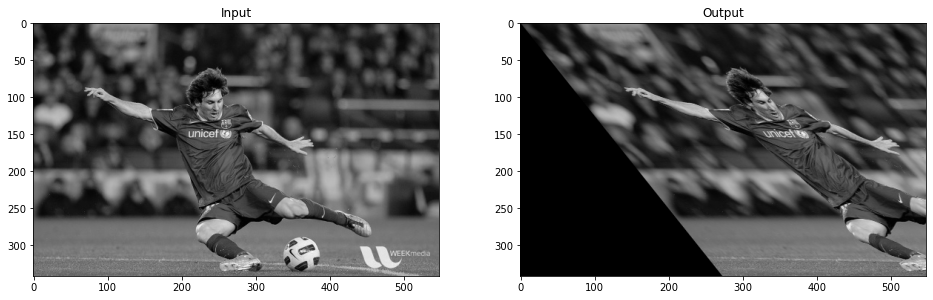

In [28]:
img = cv.imread('messi5.jpg',0)

# shear image x:0.8
# TODO
print(img.shape)
rows,cols = img.shape
M_shear = np.float32([
    [1, 0.8, 0],
    [0, 1, 0],
    [0, 0, 1],])
dst = cv.warpPerspective(img, M_shear, (cols, rows))


plt.subplot(121),plt.imshow(cv.cvtColor(img,cv.COLOR_BGR2RGB)),plt.title('Input')
plt.subplot(122),plt.imshow(cv.cvtColor(dst,cv.COLOR_BGR2RGB)),plt.title('Output')
plt.show()

## Translation

Use cv.warpPerspective() function.
$M = \begin{bmatrix} 1 & 0 & t_x \\ 0 & 1 & t_y \\ 0 & 0 & 1\end{bmatrix}$

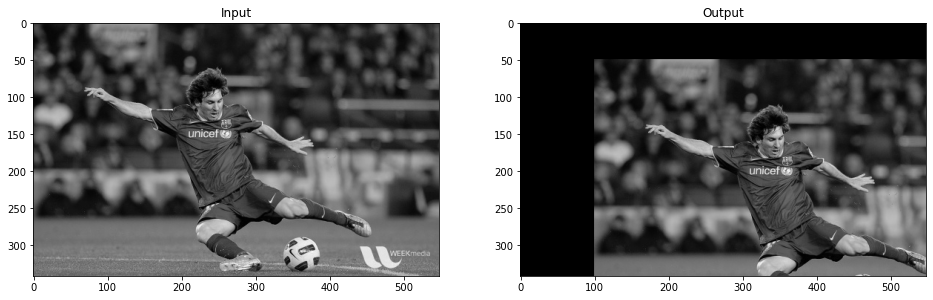

In [29]:
img = cv.imread('messi5.jpg',0)

# translate image (translation of (100,50))
# TODO
rows,cols = img.shape
M_translate = np.float32([
    [1, 0, 100],
    [0, 1, 50],
    [0, 0, 1],])
dst = cv.warpPerspective(img, M_translate, (cols, rows))


plt.subplot(121),plt.imshow(cv.cvtColor(img,cv.COLOR_BGR2RGB)),plt.title('Input')
plt.subplot(122),plt.imshow(cv.cvtColor(dst,cv.COLOR_BGR2RGB)),plt.title('Output')
plt.show()

## Rotation

- Use cv.warpPerspective() function.
- Don't use cv.getRotationMatrix2D() function
- `np.radians(degree)`

$M = \begin{bmatrix} cos\theta & -sin\theta & 0 \\ sin\theta & cos\theta & 0 \\ 0 & 0 & 1\end{bmatrix}$

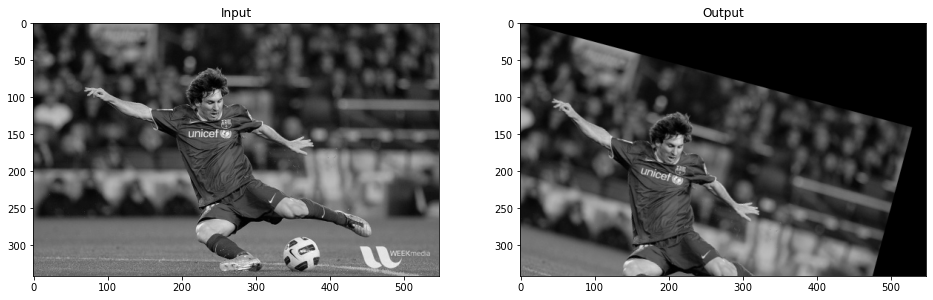

In [31]:
img = cv.imread('messi5.jpg',0)

# compute rotation matrix and rotate image (center should be image center, angle=45, scale=1)
# TODO
rows,cols = img.shape # cols-1 and rows-1 are the coordinate limits.
degree = 15
# hint: use np.cos, np.sin, (np.sin and np.cos use radians as input. use np.radians to convert degree to radian)
M_rotate = np.float32([
    [np.cos(np.radians(15)), -np.sin(np.radians(15)), 0],
    [np.sin(np.radians(15)), np.cos(np.radians(15)), 0],
    [0, 0, 1],])
dst = cv.warpPerspective(img, M_rotate, (cols, rows))

plt.subplot(121),plt.imshow(cv.cvtColor(img,cv.COLOR_BGR2RGB)),plt.title('Input')
plt.subplot(122),plt.imshow(cv.cvtColor(dst,cv.COLOR_BGR2RGB)),plt.title('Output')
plt.show()

## Composition

- Use cv.warpPerspective() function.
- Apply M_scale, M_shear, M_translate, M_rotate in that order

$M_{rotate} (M_{translate} (M_{shear} (M_{scale} (img)))) = M_{total} (img)$

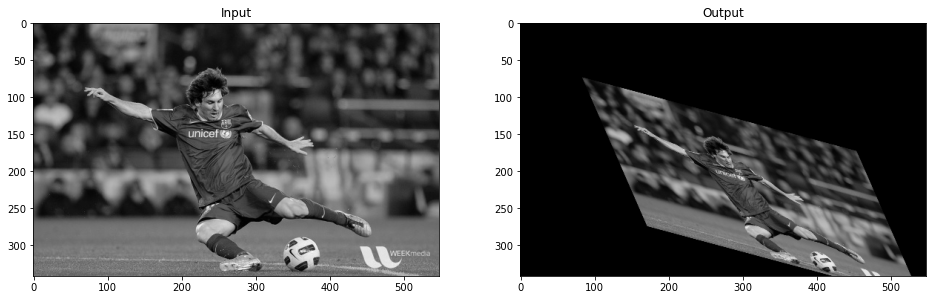

In [40]:
img = cv.imread('messi5.jpg',0)

# compute rotation matrix and rotate image (center should be image center, angle=45, scale=1)
# TODO
rows,cols = img.shape # cols-1 and rows-1 are the coordinate limits.

# use np.matmul to multiply matrices.
# composite 4 perspective from above cells.
M = np.matmul(M_rotate, np.matmul(M_translate, np.matmul(M_shear, M_scale)))
dst = cv.warpPerspective(img, M, (cols, rows))


plt.subplot(121),plt.imshow(cv.cvtColor(img,cv.COLOR_BGR2RGB)),plt.title('Input')
plt.subplot(122),plt.imshow(cv.cvtColor(dst,cv.COLOR_BGR2RGB)),plt.title('Output')
plt.show()

## Affine Matrix

- Implement getAffineTransform() function
- Hints
    - Inverse Matrix : np.linalg.inv(mat) 
    - Matrix Multiplication : np.matmul(mat1, mat2)
    - $\begin{bmatrix} x_1 & y_1 & 0 & 0 & 1 & 0 \\ 0 & 0 & x_1 & y_1 & 0 & 1 \\ x_2 & y_2 & 0 & 0 & 1 & 0 \\ 0 & 0 & x_2 & y_2 & 0 & 1 \\ x_3 & y_3 & 0 & 0 & 1 & 0 \\ 0 & 0 & x_3 & y_3 & 0 & 1 \end{bmatrix} \begin{bmatrix}  a \\ b \\ c \\ d \\ e \\ f \end{bmatrix} =  \begin{bmatrix} x'_1 \\ y'_1 \\ x'_2 \\ y'_2 \\ x'_3 \\ y'_3  \end{bmatrix} $

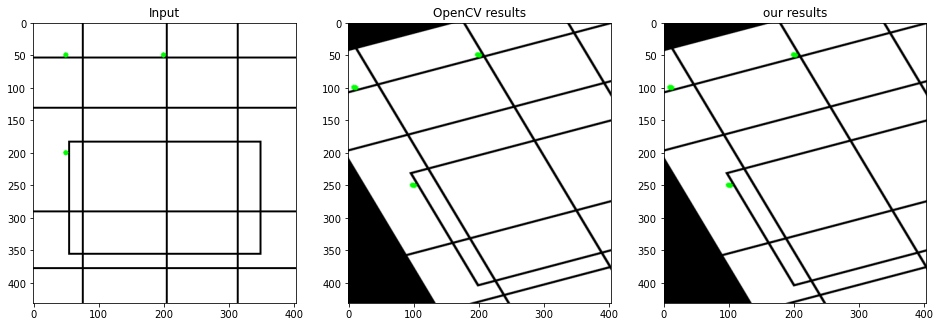

In [41]:
img = cv.imread('drawing.png')

pts1 = np.float32([[50,50],[200,50],[50,200]])
pts2 = np.float32([[10,100],[200,50],[100,250]])

# draw points
for p in pts1:
    p = p.astype('int32')
    img = cv.circle(img, tuple(p), radius=0, color=(0, 255, 0), thickness=8)

rows,cols,ch = img.shape

def getAffineTransform(src_pts, target_pts):
    # TODO
    x1 ,y1 = src_pts[0]
    x2 ,y2 = src_pts[1]
    x3 ,y3 = src_pts[2]
    
    x1_ ,y1_ = target_pts[0]
    x2_ ,y2_ = target_pts[1]
    x3_ ,y3_ = target_pts[2]

    m = [[x1, y1, 0, 0, 1, 0],
         [0, 0, x1, y1, 0, 1],
         [x2, y2, 0, 0, 1, 0],
         [0, 0, x2, y2, 0, 1],
         [x3, y3, 0, 0, 1, 0],
         [0, 0, x3, y3, 0, 1]
        ]
    
    t = [x1_, y1_, x2_, y2_, x3_, y3_]
    
    m_inv = np.linalg.inv(m)
    
    a, b, c, d, e, f = np.matmul(m_inv, t)
    affineMat = np.array(
    [[a,b,e],
     [c,d,f],
     [0,0,1]])
    
    return affineMat

M = cv.getAffineTransform(pts1,pts2)
dst1 = cv.warpAffine(img,M,(cols,rows))

M = getAffineTransform(pts1,pts2)
dst2 = cv.warpPerspective(img,M,(cols,rows))

plt.subplot(131),plt.imshow(cv.cvtColor(img,cv.COLOR_BGR2RGB)),plt.title('Input')
plt.subplot(132),plt.imshow(cv.cvtColor(dst1,cv.COLOR_BGR2RGB)),plt.title('OpenCV results')
plt.subplot(133),plt.imshow(cv.cvtColor(dst2,cv.COLOR_BGR2RGB)),plt.title('our results')
plt.show()

## Projective Matrix

- Implement getPerspectiveTransform() function
- Hints
    - Inverse Matrix : np.linalg.inv(mat) 
    - Matrix Multiplication : np.matmul(mat1, mat2)
    -  $\begin{bmatrix} x_1 & y_1 & 1 & 0 & 0 & 0 & -x_1x'_1 & -y_1x'_1 \\ 0 & 0 & 0 & x_1 & y_1 & 1 & -x_1y'_1 & -y_1y'_1 \\ x_2 & y_2 & 1 & 0 & 0 & 0 & -x_2x'_2 & -y_2x'_2 \\ 0 & 0 & 0 & x_2 & y_2 & 1 & -x_2y'_2 & -y_2y'_2 \\ x_3 & y_3 & 1 & 0 & 0 & 0 & -x_3x'_3 & -y_3x'_3 \\ 0 & 0 & 0 & x_3 & y_3 & 1 & -x_3y'_3 & -y_3y'_3 \\ x_4 & y_4 & 1 & 0 & 0 & 0 & -x_4x'_4 & -y_4x'_4 \\ 0 & 0 & 0 & x_4 & y_4 & 1 & -x_4y'_4 & -y_4y'_4 \\ 
    \end{bmatrix} \begin{bmatrix}  a \\ b \\ c \\ d \\ e \\ f \\ g \\ h \end{bmatrix} =  \begin{bmatrix} x'_1 \\ y'_1 \\ x'_2 \\ y'_2 \\ x'_3 \\ y'_3  \\ x'_4 \\ y'_4 \end{bmatrix} $
 

In [ ]:
img = cv.imread('sudoku.png')


pts1 = np.float32([[72,87],[490,70],[40,513],[519,519]])
pts2 = np.float32([[0,0],[300,0],[0,300],[300,300]])

# draw points
for p in pts1:
    p = p.astype('int32')
    img = cv.circle(img, tuple(p), radius=0, color=(0, 255, 0), thickness=8)

## Affine Matrix
rows,cols,ch = img.shape


# compute perspective transformation matrix and transform image (dsize=(300,300))
# TODO
def getPerspectiveTransform(src_pts, target_pts):
    # TODO
    x1 ,y1 = src_pts[0]
    x2 ,y2 = src_pts[1]
    x3 ,y3 = src_pts[2]
    x4 ,y4 = src_pts[3]
    
    x1_ ,y1_ = target_pts[0]
    x2_ ,y2_ = target_pts[1]
    x3_ ,y3_ = target_pts[2]
    x4_ ,y4_ = target_pts[3]
    
    ...
    a,b,c,d,e,f,g,h = ...
    perpectiveMat = np.array(
    [[a,b,c],
     [d,e,f],
     [g,h,1]])
    
    return perpectiveMat

M = cv.getPerspectiveTransform(pts1,pts2)
dst1 = cv.warpPerspective(img,M,(300,300))

M = getPerspectiveTransform(pts1,pts2)
dst2 = cv.warpPerspective(img,M,(300,300))

plt.subplot(131),plt.imshow(cv.cvtColor(img,cv.COLOR_BGR2RGB)),plt.title('Input')
plt.subplot(132),plt.imshow(cv.cvtColor(dst1,cv.COLOR_BGR2RGB)),plt.title('OpenCV results')
plt.subplot(133),plt.imshow(cv.cvtColor(dst2,cv.COLOR_BGR2RGB)),plt.title('our results')
plt.show()